# Lead scoring dataset EDA, Data cleaning, Model tuning & Model selection

## 1. EDA and Data Cleaning

In [1]:
# imports

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the data
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# number of records and features
data.shape

(9240, 37)

In [4]:
# Lets make column names a bit more consistent replacing spaces with _ and using lowercase
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(2)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [5]:
# Lets transpose to see the columns better
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239
prospect_id,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852,2058ef08-2858-443e-a01f-a9237db2f5ce,9fae7df4-169d-489b-afe4-0f3d752542ed,20ef72a2-fb3b-45e0-924e-551c5fa59095,cfa0128c-a0da-4656-9d47-0aa4e67bf690,af465dfc-7204-4130-9e05-33231863c4b5,...,d11c15b7-8056-45a6-8954-771c0d0495fe,4aeae36b-2b57-494f-bdab-dd58844286b4,2d0109e9-dfb2-4664-83de-c2ea75ec7516,3f715465-2546-47cd-afa8-8b8dc63b8b43,c0b25922-511f-4c56-852e-ced210a45447,19d6451e-fcd6-407c-b83b-48e1af805ea9,82a7005b-7196-4d56-95ce-a79f937a158d,aac550fe-a586-452d-8d3c-f1b62c94e02c,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
lead_number,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616,...,579701,579697,579642,579622,579615,579564,579546,579545,579538,579533
lead_origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission,API,Landing Page Submission,API,Landing Page Submission,API,...,Landing Page Submission,Landing Page Submission,Landing Page Submission,API,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission,Landing Page Submission
lead_source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google,Olark Chat,Google,Olark Chat,Direct Traffic,Google,...,Google,Google,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Direct Traffic,Google,Direct Traffic
do_not_email,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,No,No
do_not_call,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
converted,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,1,1,0,0,1,1
totalvisits,0.0,5.0,2.0,1.0,2.0,0.0,2.0,0.0,2.0,4.0,...,2.0,8.0,2.0,13.0,5.0,8.0,2.0,2.0,3.0,6.0
total_time_spent_on_website,0,674,1532,305,1428,0,1640,0,71,58,...,870,1016,1770,1409,210,1845,238,199,499,1279
page_views_per_visit,0.0,2.5,2.0,1.0,1.0,0.0,2.0,0.0,2.0,4.0,...,2.0,4.0,2.0,2.6,2.5,2.67,2.0,2.0,3.0,3.0


We notice quite a few categorical values for features which means that we will need one hot-encoding for some and mapping for some others like the scores and indices columns

In [6]:
# some statistics for numerical values
data.describe().round()

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
count,9240.0,9240.0,9103.0,9240.0,9103.0,5022.0,5022.0
mean,617188.0,0.0,3.0,488.0,2.0,14.0,16.0
std,23406.0,0.0,5.0,548.0,2.0,1.0,2.0
min,579533.0,0.0,0.0,0.0,0.0,7.0,11.0
25%,596484.0,0.0,1.0,12.0,1.0,14.0,15.0
50%,615479.0,0.0,3.0,248.0,2.0,14.0,16.0
75%,637387.0,1.0,5.0,936.0,3.0,15.0,18.0
max,660737.0,1.0,251.0,2272.0,55.0,18.0,20.0


In [7]:
# find NaNs in all columns
data.isnull().sum(axis=0)

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [8]:
# Find the overall conversion rate of leads
global_conversion_rate = data.converted.mean()
global_conversion_rate

0.3853896103896104

In [9]:
data.dtypes

prospect_id                                       object
lead_number                                        int64
lead_origin                                       object
lead_source                                       object
do_not_email                                      object
do_not_call                                       object
converted                                          int64
totalvisits                                      float64
total_time_spent_on_website                        int64
page_views_per_visit                             float64
last_activity                                     object
country                                           object
specialization                                    object
how_did_you_hear_about_x_education                object
what_is_your_current_occupation                   object
what_matters_most_to_you_in_choosing_a_course     object
search                                            object
magazine                       

**Data process**

In [10]:
# Let's find the categorical columns

categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

# and numerical columns as well
num_columns =['lead_number'] + list(data.dtypes[data.dtypes == 'float'].index)

In [11]:
# Lets make categorical data in columns consistent as well
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

For the categorical columns lets see the unique values in each of those and the NaNs

In [12]:
data[categorical_columns].nunique().sort_values(ascending=False)

prospect_id                                      9240
country                                            38
tags                                               26
lead_source                                        20
specialization                                     19
last_activity                                      17
last_notable_activity                              16
how_did_you_hear_about_x_education                 10
city                                                7
what_is_your_current_occupation                     6
lead_profile                                        6
lead_origin                                         5
lead_quality                                        5
what_matters_most_to_you_in_choosing_a_course       3
asymmetrique_profile_index                          3
asymmetrique_activity_index                         3
do_not_call                                         2
do_not_email                                        2
a_free_copy_of_mastering_the

In [13]:
data[categorical_columns].isnull().sum(axis=0).sort_values(ascending=False)

lead_quality                                     4767
asymmetrique_activity_index                      4218
asymmetrique_profile_index                       4218
tags                                             3353
lead_profile                                     2709
what_matters_most_to_you_in_choosing_a_course    2709
what_is_your_current_occupation                  2690
country                                          2461
how_did_you_hear_about_x_education               2207
specialization                                   1438
city                                             1420
last_activity                                     103
lead_source                                        36
i_agree_to_pay_the_amount_through_cheque            0
a_free_copy_of_mastering_the_interview              0
get_updates_on_dm_content                           0
update_me_on_supply_chain_content                   0
prospect_id                                         0
newspaper                   

Of course each ID is unique, however there are a lot of unique values in other columns like country, lead quality and more. We are rather uncertain at this point of the importance of these features. We might want later to check the importance. We can check in more detail the colums with multiple unique values to see whether we can limit them. One straight forward option we have is to replace countries with continents, since having 38 different countries will increase a lot the number of features after one hot encoding. In a similar way we can keep only the top 3 categorical values in other columns and use other for the rest.

In [14]:
# check the country column
data.country.value_counts()

india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

A large chunk of dataset has India as the country 6500, while NaNs seem to be over 2k, of course if something in the data changes we might need to rethink the approach and implement something like replacing countries with continents as was stated, but based on this data we see that most users come from India, so we will base the analysis on that fact. 

In [15]:
data.tags.value_counts()

will_revert_after_reading_the_email                  2072
ringing                                              1203
interested_in_other_courses                           513
already_a_student                                     465
closed_by_horizzon                                    358
switched_off                                          240
busy                                                  186
lost_to_eins                                          175
not_doing_further_education                           145
interested__in_full_time_mba                          117
graduation_in_progress                                111
invalid_number                                         83
diploma_holder_(not_eligible)                          63
wrong_number_given                                     47
opp_hangup                                             33
number_not_provided                                    27
in_touch_with_eins                                     12
lost_to_others

In [16]:
columns = ['country',
'tags',
'lead_source'   ,                                   
'specialization'  ,                                   
'last_activity'  ,                                    
'last_notable_activity' ,                             
'how_did_you_hear_about_x_education',                
'city'         ,                                       
'what_is_your_current_occupation',                    
'lead_profile'    ,                                    
'lead_origin' ,                                       
'lead_quality']    

for c in columns:
    print(c)
    print(data[c].value_counts())
    print()
    print()

country
india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

We have a lot of data with many columns with more than 3 unique values:
- country prolly drop the column
- tags indentify the top 3  and use other for the rest (including NaNs)
- lead_source same as above  top3                                    
- specialization                                     
- last_activity  lets keep only the last notable since they both contain the same types of activities                       
- last_notable_activity     x                         
- how_did_you_hear_about_x_education                 
- city                                                
- what_is_your_current_occupation                    
- lead_profile                                        
- lead_origin                                         
- lead_quality 

We will apply this in all columns except the country column that we will drop

**Data process**

In [17]:
columns = [
'tags',
'lead_source'   ,                                   
'specialization'  ,                                   
'last_activity'  ,                                    
'last_notable_activity' ,                             
'how_did_you_hear_about_x_education',                
'city'         ,                                       
'what_is_your_current_occupation',                    
'lead_profile'    ,                                    
'lead_origin' ,                                       
'lead_quality']    

In [18]:
# Lets keep the top 3 values 
selected_cat_var={}
for c in columns:
    selected_cat_var[c]=list(data[c].value_counts()[0:3].index)

Now lets apply a function to replace our data

In [19]:
# lets make a function since we might use this also for other columns
def replace_data(data, allowed_data_list):
    if data not in allowed_data_list:
        return 'other'
    return data

# Apply the function
for c in columns:
    data[c] = data[c].apply(replace_data, allowed_data_list=selected_cat_var[c])

Now the dataset is a bit limited in terms of unique values in categorical columns

In [20]:
data[categorical_columns].nunique().sort_values(ascending=False)

prospect_id                                      9240
country                                            38
what_is_your_current_occupation                     4
city                                                4
lead_profile                                        4
lead_quality                                        4
tags                                                4
lead_origin                                         4
last_notable_activity                               4
how_did_you_hear_about_x_education                  4
specialization                                      4
lead_source                                         4
last_activity                                       4
asymmetrique_profile_index                          3
asymmetrique_activity_index                         3
what_matters_most_to_you_in_choosing_a_course       3
newspaper_article                                   2
x_education_forums                                  2
a_free_copy_of_mastering_the

Remember that: There a couple of columns with a lot of NaNs, we need to decide whether we drop some columns or what we do with the NaNs, dropping all the records would limit the dataset a lot. Especially for the activity and profile score and indices these are too many. 

In [21]:
data.isnull().sum(axis=0)

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                         0
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                       0
country                                          2461
specialization                                      0
how_did_you_hear_about_x_education                  0
what_is_your_current_occupation                     0
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [22]:
data[categorical_columns].isnull().sum(axis=0)/(data.shape[0])

prospect_id                                      0.000000
lead_origin                                      0.000000
lead_source                                      0.000000
do_not_email                                     0.000000
do_not_call                                      0.000000
last_activity                                    0.000000
country                                          0.266342
specialization                                   0.000000
how_did_you_hear_about_x_education               0.000000
what_is_your_current_occupation                  0.000000
what_matters_most_to_you_in_choosing_a_course    0.293182
search                                           0.000000
magazine                                         0.000000
newspaper_article                                0.000000
x_education_forums                               0.000000
newspaper                                        0.000000
digital_advertisement                            0.000000
through_recomm

Lets fill the NaN values with unk for categorical data instead, to indicate that data is unknown, in a way we can capture the behavior of customers not providing info and its effect on their behavior, on the other hand it can be that this data was lost in some process of the data collection. But lets assume its the first reason for this case

**Data process**

In [23]:
data[categorical_columns]=data[categorical_columns].fillna('unk')

In [24]:
data[num_columns].isnull().sum(axis=0)/(data.shape[0])

lead_number                    0.000000
totalvisits                    0.014827
page_views_per_visit           0.014827
asymmetrique_activity_score    0.456494
asymmetrique_profile_score     0.456494
dtype: float64

since indices and scores are describing the same thing we can drop one or the other. Lets drop the scores, and for the rest numerical we can drop the specific records. Lead numbers are the same to ids and are not actually part of the numerical columns

In [25]:
to_drop=['asymmetrique_activity_score','asymmetrique_profile_score', 'lead_number']
num_columns = [c for c in num_columns if c not in to_drop] # update num columns list
data = data.drop(to_drop, axis=1)

data.dropna(axis=0, how='any', inplace=True)

In [26]:
data.isnull().sum().sum()

0

In [27]:
data

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,...,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark_chat,no,no,0,0.0,0,0.00,other,...,other,no,no,select,select,02.medium,02.medium,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,other,no,no,0,5.0,674,2.50,email_opened,...,other,no,no,select,select,02.medium,02.medium,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.00,email_opened,...,might_be,no,no,potential_lead,mumbai,02.medium,01.high,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.00,other,...,not_sure,no,no,select,mumbai,02.medium,01.high,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing_page_submission,google,no,no,1,2.0,1428,1.00,other,...,might_be,no,no,select,mumbai,02.medium,01.high,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,landing_page_submission,direct_traffic,yes,no,1,8.0,1845,2.67,other,...,high_in_relevance,no,no,potential_lead,mumbai,02.medium,01.high,no,no,other
9236,82a7005b-7196-4d56-95ce-a79f937a158d,landing_page_submission,direct_traffic,no,no,0,2.0,238,2.00,sms_sent,...,might_be,no,no,potential_lead,mumbai,02.medium,01.high,no,yes,sms_sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,landing_page_submission,direct_traffic,yes,no,0,2.0,199,2.00,sms_sent,...,not_sure,no,no,potential_lead,mumbai,02.medium,01.high,no,yes,sms_sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,landing_page_submission,google,no,no,1,3.0,499,3.00,sms_sent,...,other,no,no,other,other,02.medium,02.medium,no,no,sms_sent


Now we can make the split for train,val,test and do an analysis on feature importance that could limit our dataset further.

## 2. Dataset split and feature importance

Maybe we can check the feature importance especially for categorical columns that we also saw contain a lot of unique values and we can make a more informed decision on what to keep and drop. Lets use mutual information score for the categorical values and correlation for the numerical ones.

### Categorical columns

In [28]:
categorical_columns.remove('prospect_id')

In [29]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42) 
df_train, df_val = train_test_split(df_full_train, test_size = 0.25 ,random_state = 42)

In [30]:
from sklearn.metrics import mutual_info_score

def mutual_info_conversion_score(series):
    return mutual_info_score(series, df_full_train.converted)

mi = df_full_train[categorical_columns].apply(mutual_info_conversion_score)

mi.sort_values(ascending = False)

tags                                             0.264778
lead_quality                                     0.124857
lead_profile                                     0.101697
what_is_your_current_occupation                  0.089669
last_activity                                    0.078608
last_notable_activity                            0.074374
what_matters_most_to_you_in_choosing_a_course    0.056919
lead_origin                                      0.050486
how_did_you_hear_about_x_education               0.032104
lead_source                                      0.020237
city                                             0.015538
asymmetrique_activity_index                      0.010368
do_not_email                                     0.010201
asymmetrique_profile_index                       0.007185
specialization                                   0.004062
country                                          0.004019
a_free_copy_of_mastering_the_interview           0.000597
do_not_call   

Its probably safe to assume thats its safe to drop columns with MI<0.01

In [31]:
categ_to_drop = list(mi[mi<0.01].index)

In [32]:
categorical_columns = [c for c in categorical_columns if c not in categ_to_drop]

### Numerical columns

We can check the feature importance also for the limited numerical columns

In [33]:
df_full_train[num_columns].corrwith(df_full_train.converted)

totalvisits             0.031911
page_views_per_visit   -0.001724
dtype: float64

so it seems that theres a positive correlation with total visits and a slight negative correlation with page views per visit. Since there are only these two left as numerical columns we will keep both

In [34]:
df_full_train = df_full_train.drop(categ_to_drop, axis=1)
df_full_train = df_full_train.reset_index(drop = True)

In [35]:
df_train = df_train.drop(categ_to_drop, axis=1)
df_val = df_val.drop(categ_to_drop, axis=1)
df_test = df_test.drop(categ_to_drop, axis=1)

In [36]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# delete the target variable
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [37]:
def prepare_datasets(df, categorical_to_drop):
    
    df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42) 
    df_train, df_val = train_test_split(df_full_train, test_size = 0.25 ,random_state = 42)
    df_full_train = df_full_train.drop(categ_to_drop, axis=1)
    df_full_train = df_full_train.reset_index(drop = True)
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    y_train = df_train.converted.values
    y_val = df_val.converted.values
    y_test = df_test.converted.values

    # delete the target variable
    del df_train['converted']
    del df_val['converted']
    del df_test['converted']
    
    return df_train, y_train, df_val, y_val, df_test, y_test

In [38]:
print(categorical_columns)
print()
print(num_columns)

['lead_origin', 'lead_source', 'do_not_email', 'last_activity', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'tags', 'lead_quality', 'lead_profile', 'city', 'asymmetrique_activity_index', 'last_notable_activity']

['totalvisits', 'page_views_per_visit']


In [39]:
df_full_train

,prospect_id,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,last_notable_activity
0,a71fc1e8-9edf-4a7a-9678-1db27cc35924,landing_page_submission,direct_traffic,yes,1,1.0,869,1.00,other,select,unemployed,better_career_prospects,other,other,potential_lead,mumbai,02.medium,modified
1,36eaf496-868f-4bbf-a839-e22280a4d4a0,landing_page_submission,google,no,0,6.0,397,6.00,sms_sent,other,other,unk,other,other,other,thane_&_outskirts,unk,modified
2,ad092b3c-c7e2-4d17-b1b3-1d1145b4d1de,landing_page_submission,other,no,0,5.0,124,2.50,sms_sent,online_search,other,unk,other,other,other,mumbai,02.medium,modified
3,a4c60856-d7aa-4c7e-806e-ab3339d33763,landing_page_submission,other,no,1,5.0,1366,2.50,email_opened,select,working_professional,better_career_prospects,other,might_be,other,mumbai,02.medium,modified
4,6e928527-0009-491e-a15d-6dbfdfc60bf3,landing_page_submission,direct_traffic,no,1,2.0,1106,2.00,sms_sent,select,working_professional,better_career_prospects,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,unk,sms_sent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,9a7004cc-a702-4dea-b643-54010ff97c8e,landing_page_submission,direct_traffic,no,0,3.0,62,1.50,sms_sent,online_search,unemployed,better_career_prospects,interested_in_other_courses,high_in_relevance,potential_lead,mumbai,02.medium,modified
7278,a366034a-f726-4131-aaef-25aabd0ec4ec,landing_page_submission,other,no,0,3.0,1109,3.00,sms_sent,select,unemployed,better_career_prospects,ringing,other,select,mumbai,unk,sms_sent
7279,4cdbd385-1334-4dae-8827-29e82015903f,landing_page_submission,direct_traffic,no,0,14.0,143,1.56,other,select,unemployed,better_career_prospects,other,other,other,mumbai,unk,other
7280,baeb2f65-f796-4269-8cf1-54601cb1edcc,landing_page_submission,other,no,0,5.0,331,1.67,email_opened,other,other,unk,other,other,other,other,02.medium,email_opened


In [40]:
df_train[categorical_columns + num_columns]

,lead_origin,lead_source,do_not_email,last_activity,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,last_notable_activity,totalvisits,page_views_per_visit
0,landing_page_submission,google,no,email_opened,other,unemployed,better_career_prospects,other,not_sure,select,other,03.low,modified,3.0,3.0
1,landing_page_submission,direct_traffic,no,other,select,unemployed,better_career_prospects,ringing,might_be,select,mumbai,unk,modified,1.0,1.0
2,api,google,yes,sms_sent,other,other,unk,other,other,other,other,unk,sms_sent,3.0,3.0
3,api,olark_chat,no,email_opened,select,unemployed,better_career_prospects,interested_in_other_courses,other,select,select,02.medium,modified,0.0,0.0
4,landing_page_submission,direct_traffic,no,email_opened,other,other,unk,other,other,other,other,unk,email_opened,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,landing_page_submission,google,no,email_opened,other,unemployed,better_career_prospects,other,other,other,mumbai,unk,email_opened,6.0,6.0
5457,landing_page_submission,direct_traffic,no,sms_sent,word_of_mouth,unemployed,better_career_prospects,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,sms_sent,7.0,7.0
5458,landing_page_submission,other,no,email_opened,select,unemployed,better_career_prospects,interested_in_other_courses,other,select,mumbai,unk,email_opened,9.0,9.0
5459,api,olark_chat,no,sms_sent,select,unemployed,better_career_prospects,other,other,select,select,02.medium,sms_sent,0.0,0.0


## 3. One-hot encoding

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
train_dicts = df_train[categorical_columns + num_columns].to_dict(orient = 'records')

train_dicts[0]

{'lead_origin': 'landing_page_submission',
 'lead_source': 'google',
 'do_not_email': 'no',
 'last_activity': 'email_opened',
 'how_did_you_hear_about_x_education': 'other',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'tags': 'other',
 'lead_quality': 'not_sure',
 'lead_profile': 'select',
 'city': 'other',
 'asymmetrique_activity_index': '03.low',
 'last_notable_activity': 'modified',
 'totalvisits': 3.0,
 'page_views_per_visit': 3.0}

In [43]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical_columns + num_columns].to_dict(orient = 'records')
X_val = dv.transform(val_dicts) 

test_dicts = df_test[categorical_columns + num_columns].to_dict(orient = 'records')
X_test = dv.transform(test_dicts) 

In [44]:
val_dicts[0]

{'lead_origin': 'landing_page_submission',
 'lead_source': 'direct_traffic',
 'do_not_email': 'yes',
 'last_activity': 'sms_sent',
 'how_did_you_hear_about_x_education': 'other',
 'what_is_your_current_occupation': 'other',
 'what_matters_most_to_you_in_choosing_a_course': 'unk',
 'tags': 'other',
 'lead_quality': 'other',
 'lead_profile': 'other',
 'city': 'mumbai',
 'asymmetrique_activity_index': 'unk',
 'last_notable_activity': 'modified',
 'totalvisits': 3.0,
 'page_views_per_visit': 3.0}

In [45]:
y_test==1

array([False,  True, False, ..., False,  True, False])

In [46]:
test_dicts[0]

{'lead_origin': 'landing_page_submission',
 'lead_source': 'direct_traffic',
 'do_not_email': 'no',
 'last_activity': 'other',
 'how_did_you_hear_about_x_education': 'select',
 'what_is_your_current_occupation': 'unemployed',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'tags': 'other',
 'lead_quality': 'other',
 'lead_profile': 'other',
 'city': 'other',
 'asymmetrique_activity_index': '01.high',
 'last_notable_activity': 'modified',
 'totalvisits': 1.0,
 'page_views_per_visit': 1.0}

In [47]:
dv.get_feature_names_out()

array(['asymmetrique_activity_index=01.high',
       'asymmetrique_activity_index=02.medium',
       'asymmetrique_activity_index=03.low',
       'asymmetrique_activity_index=unk', 'city=mumbai', 'city=other',
       'city=select', 'city=thane_&_outskirts', 'do_not_email=no',
       'do_not_email=yes',
       'how_did_you_hear_about_x_education=online_search',
       'how_did_you_hear_about_x_education=other',
       'how_did_you_hear_about_x_education=select',
       'how_did_you_hear_about_x_education=word_of_mouth',
       'last_activity=email_opened',
       'last_activity=olark_chat_conversation', 'last_activity=other',
       'last_activity=sms_sent', 'last_notable_activity=email_opened',
       'last_notable_activity=modified', 'last_notable_activity=other',
       'last_notable_activity=sms_sent', 'lead_origin=api',
       'lead_origin=landing_page_submission', 'lead_origin=lead_add_form',
       'lead_origin=other', 'lead_profile=other',
       'lead_profile=other_leads', 'lea

## 4. Model training and comparison 

The plan is to train, test and compare 3 models for the lead prediction. 
- A logistic regression model as a baseline
- Random forest 
- XGBoost 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

/home/gverikios/miniconda3/envs/mlzoomcamp-ubuntu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
def train(df_train, y_train, model):
    
    dicts = df_train[categorical_columns + num_columns].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical_columns + num_columns].to_dict(orient = 'records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1] # probabilities only for positive examples
    
    return y_pred

### a. Logistic Regression

#### Tuning

We will use the k-fold cross validation to find the best parameter for regularization C

In [50]:
n_splits = 5 

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]): # we cant use 0 for C
    
    scores = []
    
    kfold = KFold(n_splits = n_splits, shuffle =True, random_state = 1)

    for train_idx, val_idx in kfold.split(df_full_train): 

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values
        
        lr = LogisticRegression(C=C, max_iter = 1000)
        dv, lr = train(df_train, y_train, lr)

        y_pred = predict(df_val, dv, lr)

        auc = roc_auc_score(y_val, y_pred)

        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:01<00:10,  1.74s/it]

C=0.001 0.887 +- 0.014


 29%|██▊       | 2/7 [00:05<00:13,  2.72s/it]

C=0.01 0.930 +- 0.008


 43%|████▎     | 3/7 [00:08<00:12,  3.07s/it]

C=0.1 0.943 +- 0.006


 57%|█████▋    | 4/7 [00:12<00:09,  3.32s/it]

C=0.5 0.944 +- 0.005


 71%|███████▏  | 5/7 [00:20<00:09,  5.00s/it]

C=1.0 0.944 +- 0.005


 86%|████████▌ | 6/7 [00:26<00:05,  5.32s/it]

C=5.0 0.944 +- 0.005


100%|██████████| 7/7 [00:31<00:00,  4.56s/it]

C=10.0 0.944 +- 0.005


C = 1.0 seems like the best option

In [51]:
lr = LogisticRegression(C=1.0, max_iter = 1000)
dv, lr = train(df_full_train, df_full_train.converted.values, lr)
y_pred = predict(df_test, dv, lr)

auc = roc_auc_score(y_test, y_pred)
auc

0.9497782878606083

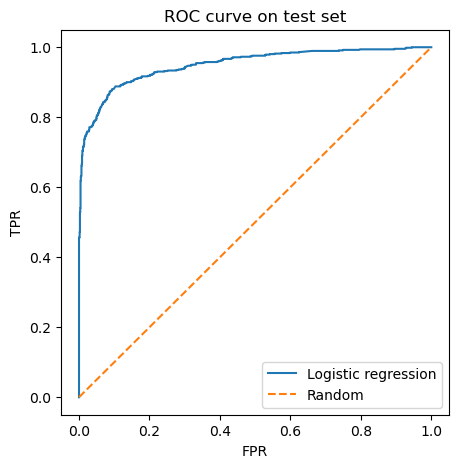

In [52]:
fpr, tpr, tresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label = 'Logistic regression')
plt.plot([0,1], [0,1], label = 'Random', linestyle = '--')

plt.title('ROC curve on test set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

The prediction accuracy in the test dataset seems to be fine and similar to the validation set

In [53]:
# redo the splits because the datasets were changed with k-fold splits
df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42) 
df_train, df_val = train_test_split(df_full_train, test_size = 0.25 ,random_state = 42)
df_full_train = df_full_train.drop(categ_to_drop, axis=1)
df_full_train = df_full_train.reset_index(drop = True)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# delete the target variable
del df_train['converted']
del df_val['converted']
del df_test['converted']

dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical_columns + num_columns].to_dict(orient = 'records')
X_val = dv.transform(val_dicts) 

test_dicts = df_test[categorical_columns + num_columns].to_dict(orient = 'records')
X_test = dv.transform(test_dicts) 

### b. Decision Trees

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

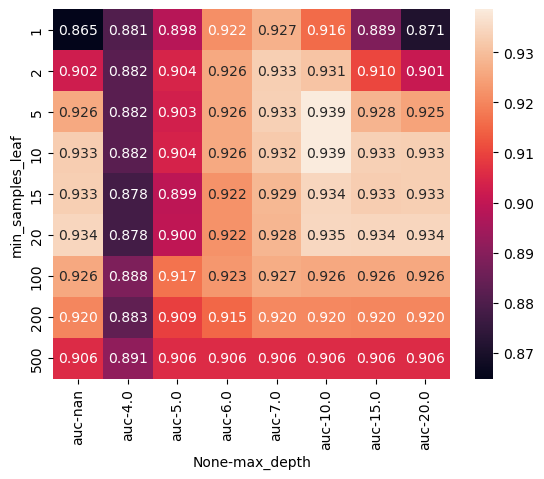

In [54]:
scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d,  min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])   
df_scores.sort_values(by='auc', ascending=False).head()
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
sns.heatmap(df_scores_pivot, annot = True, fmt='.3f') # we use annot and the format to plot also the values

Best scores for max_depth=10 with 2 min_samples_leaf values giving about the same score. So lets use min_samples_leaf=10 to have nodes with more samples and help a bit with overfiting

In [55]:
max_depth = 10
min_samples_leaf = 10
dt = DecisionTreeClassifier(max_depth=d,  min_samples_leaf=s)

dv, dt = train(df_full_train, df_full_train.converted.values, dt)
y_pred = predict(df_test, dv, dt)
                 
# auc on test
y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9112434138452711

### c. Random Forest

#### Tuning

Lets try tuning the parameters for the random forest to compare the performance starting from **max_depth** and **min_leaf_size** while looking at the number of trees

In [56]:
scores = []
for d in [5,10,15]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n,auc))

In [57]:
columns=['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.927083
1,5,20,0.929758
2,5,30,0.927776
3,5,40,0.927669
4,5,50,0.927639


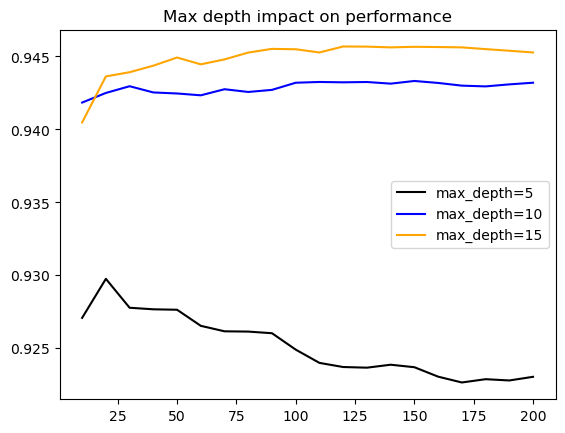

In [58]:
colors = ['black', 'blue', 'orange']
max_depth = [5,10,15]

for d, col in zip(max_depth, colors):
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label= 'max_depth=%d' % d, color=col)
    plt.legend()
    plt.title('Max depth impact on performance')

best option for these is max_depth = 15 with n between 100-125

In [59]:
max_depth =15

scores = []

for s in tqdm([1, 3, 5, 10, 50]):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n,auc))

100%|██████████| 5/5 [00:51<00:00, 10.20s/it]


In [60]:
columns=['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

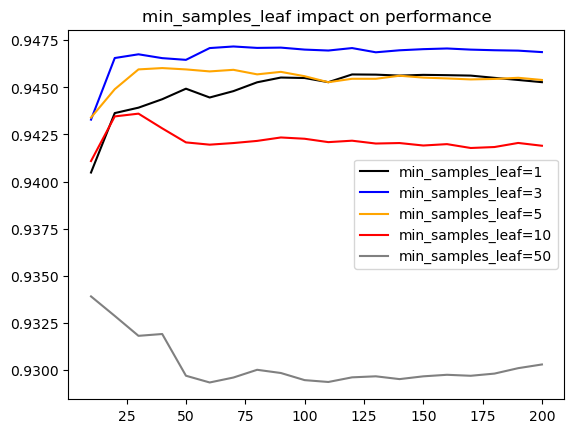

In [61]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label= 'min_samples_leaf=%s' % s, color=col)
    plt.legend()
    plt.title('min_samples_leaf impact on performance')

Best performance is achieved for min_samples_leaf=3 for 75<n<125

In [62]:
min_samples_leaf = 3
max_depth = 15
n = 100

In [63]:
# lets now train on full_train dataset
rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=42,
                                    n_jobs=-1)

dv, rf = train(df_full_train, df_full_train.converted.values, rf)
y_pred = predict(df_test, dv, rf)

In [64]:
# auc on test
y_pred = rf.predict_proba(X_test)[:, 1] # we want the second columnm, probability for the positive class
roc_auc_score(y_test, y_pred)

0.9556001878032239

### 5. Model comparison through roc curves & auc_score

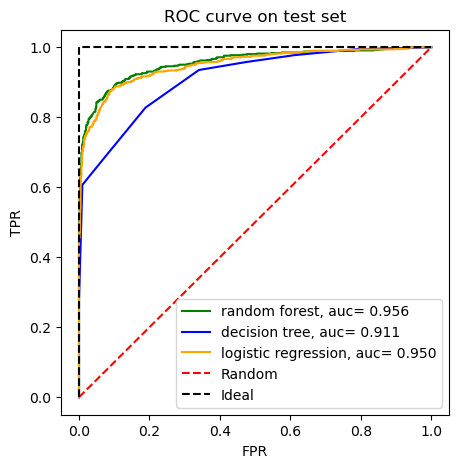

In [65]:
models = {'random forest':rf, 'decision tree':dt, 'logistic regression':lr}
colors =['green', 'blue', 'orange']
plt.figure(figsize=(5,5))

for m, col in zip(models, colors):
    y_pred = predict(df_test, dv, models[m])
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label = f'{m}, auc={auc: .3f}',color=col)
    
plt.title('ROC curve on test set')
plt.xlabel('FPR')
plt.ylabel('TPR')   
plt.plot([0,1], [0,1], label = 'Random', linestyle = '--', color='red') # include the random model
plt.plot([0,0,1], [0,1,1], label = 'Ideal', linestyle = '--', color='black')
plt.legend() 
plt.show()

Based on the auc scores we select the random forest that achieves the highest performance in the test dataset

### 6. Remarks

- It should be noted that there are a lot of features in this dataset. More specific knowledge in the specific context and data could assist in making more informed decisions on which ones to keep and which ones to drop. The analysis here being in the scope of a course was more intended to make use of specific tools (e.g. mutual information score, correlation) to assist in feature selection. 
- It was observed that in this case most of the dataset came from India, while a significant part of the data had NaN as country entries. Here the country column was dropped due to these reasons, but in the context of actually deploying such models in production, these metrics (like country of origin) should be observed and models should be updated, because underlying patters could evolve which affect prediction.
- The cross-validation method with k-folds was used for validating the logistic regression model. One might say that the dataset is large enough for validating the model with the standard holdout method, however this tool was applied again on the context of a course.